In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
from IPython.display import Image

In [2]:
np.random.seed(2)

In [3]:
#!pip install opencv-python

<div class="alert alert-block alert-warning">

### Apply SVD on face images


</div>

# Read images into trian and test

In [4]:
data_dir = 'att_faces'

In [5]:
train_faces = []
test_faces = []
train_labels = []
test_labels = []
for i in range(1,41):
    current_dir = data_dir + '/s' +str(i)
    for j in range(1,8):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        train_faces.append(im)
        train_labels.append(i)
    for j in range(8,11):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        test_faces.append(im)
        test_labels.append(i)

In [6]:
len(train_labels)

280

In [7]:
len(train_faces)

280

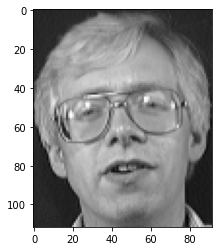

In [8]:
plt.imshow(train_faces[7],'gray')

In [9]:
train_faces[7].shape

(112, 92)

In [10]:
train_faces = np.array(train_faces)
test_faces = np.array(test_faces)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [11]:
train_faces.shape

(280, 112, 92)

In [12]:
train_faces = train_faces.reshape(train_faces.shape[0],train_faces.shape[1]*train_faces.shape[2])
test_faces = test_faces.reshape(test_faces.shape[0],test_faces.shape[1]*test_faces.shape[2])

In [13]:
train_faces.shape

(280, 10304)

### Apply PCA on faces to obtain eigenvalues and eigenvectors

In [14]:
# Compute a PCA 
n_components = 250
pca = PCA(n_components=n_components, whiten=True).fit(train_faces)
 
# apply PCA transformation
X_train_pca = pca.transform(train_faces)
X_test_pca= pca.transform(test_faces)

In [15]:
X_train_pca.shape

(280, 250)

In [16]:
pca.components_.shape

(250, 10304)

In [17]:
eigenfaces = pca.components_.reshape(250,112,92)

In [18]:
np.dot(pca.components_[5],pca.components_[13])

9.367506770274758e-17

In [19]:
eigenfaces.shape

(250, 112, 92)

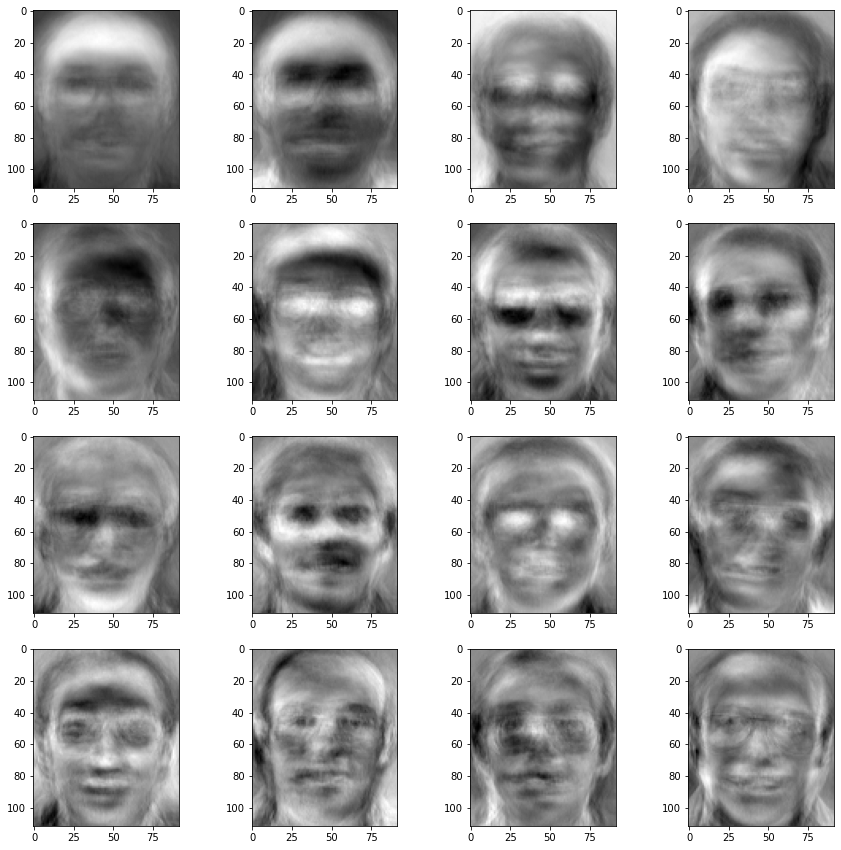

In [20]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')

In [21]:
X_train1 = pca.inverse_transform(X_train_pca)

In [22]:
X_train_pca.shape

(280, 250)

In [23]:
X_train1.shape

(280, 10304)

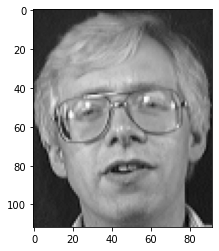

In [24]:
plt.imshow(X_train1[7].reshape(112,92),'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Find the eigenvectors (eigenfaces) and eigenvalues with SVD for the above face dataset

</div>

In [25]:
u,s,vh = np.linalg.svd(train_faces, full_matrices=False)
print(u.shape, s.shape , vh.shape)

(280, 280) (280,) (280, 10304)


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1_1

- Apply KNN(1NN) on the original faces(not reduced ones) and calculate the accuracy for the test set.

- Apply KNN(1NN) on the reduced feature space(after PCA) and calculate the accuracy for the test set.

Compare the result of the two approaches.



</div>

In [26]:
test_labels

array([ 1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17,
       18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23,
       23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29,
       29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34,
       35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40,
       40])

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Original faces
neigh = KNeighborsClassifier()
neigh.fit(train_faces, train_labels)
predicted = neigh.predict(test_faces)
print("Accuracy - Original:", accuracy_score(test_labels,predicted))
      
# PCA

neigh = KNeighborsClassifier()
neigh.fit(X_train_pca, train_labels)
predicted = neigh.predict(X_test_pca)
print("Accuracy - Reduced:", accuracy_score(test_labels,predicted))
     
      

Accuracy - Original: 0.9
Accuracy - Reduced: 0.225


<div class="alert alert-block alert-warning">

### Decision tree visualiztion and rules extraction


</div>

In [41]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [42]:
np.unique(y)

array([0, 1, 2])

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

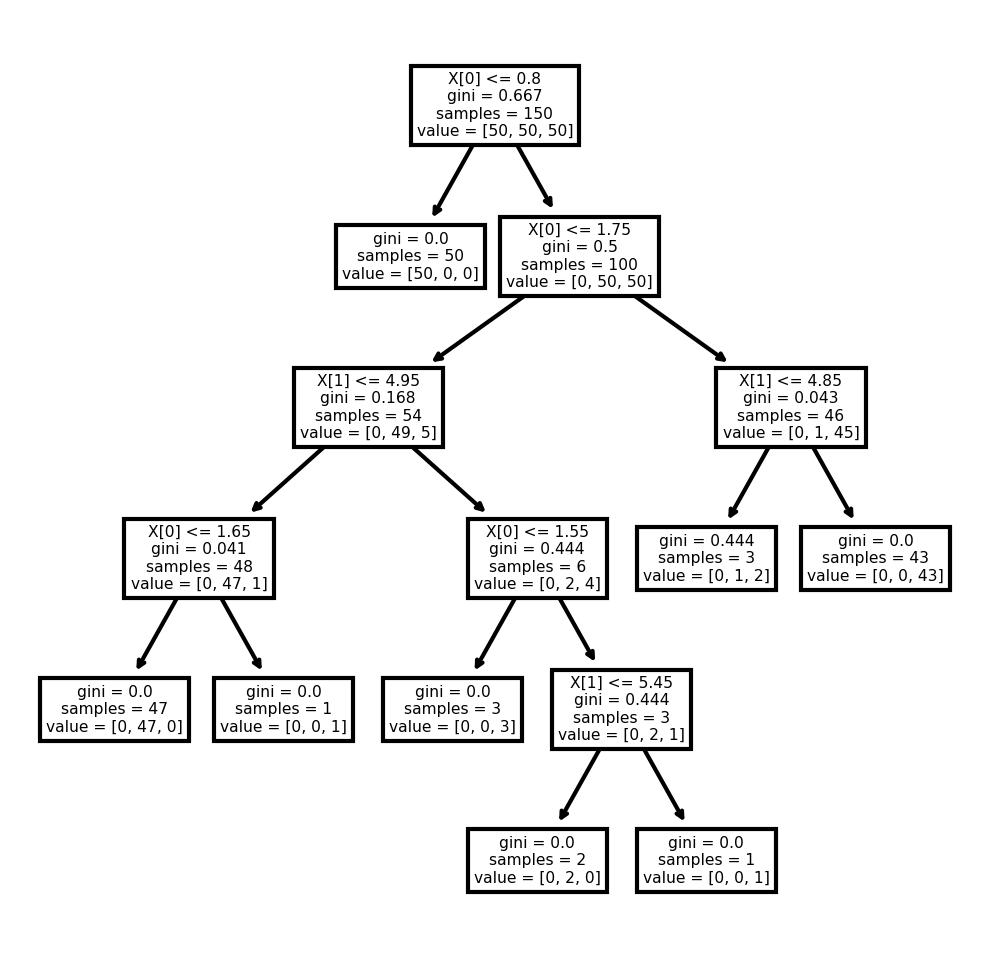

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree);
fig.savefig('imagename.png')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Find the two most important features according to the decision tree output.

</div>

In [87]:
dtree.feature_importances_
topFeatures = [col for col,_ in sorted(zip(df.columns, dtree.feature_importances_),key=lambda x: x[1], reverse=True)]

print("Top features:", topFeatures)


Top features: ['sepal length (cm)', 'sepal width (cm)']


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Train a decision tree based on the two most important features, and plot the decision boundary including data samples.


</div>

c:\users\fredr\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0.5, 1.0, 'Decision boundary')

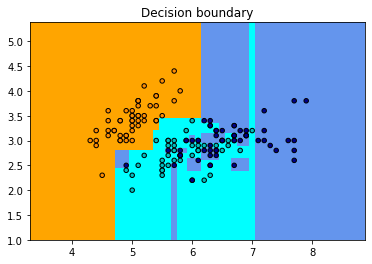

In [94]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

df1 = df[topFeatures]
dtree.fit(df1,y)
df1 = df1.to_numpy()


x_min, x_max = df1[:, 0].min() - 1, df1[:, 0].max() + 1
y_min, y_max = df1[:, 1].min() - 1, df1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(df1[:, 0], df1[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision boundary")
    

<div class="alert alert-block alert-warning">

### Bayesian Network


</div>

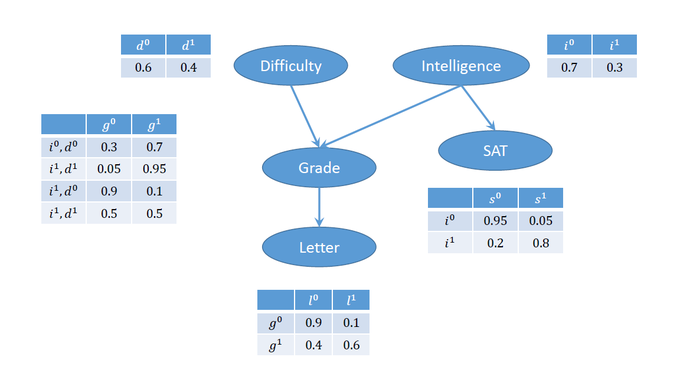

In [33]:
Image("Images/Student model.png")

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Difficulty and Intelligence
- Join probability of Difficulty and Intelligence given Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [2]:
import numpy as np
P_D = np.array([# Probability of Difficulty
    [0.6,0.4]
]) 
P_I = np.array([# Probability of Intelligence
    [0.7,0.3]
]) 

P_G_ID = np.array([ # Conditional probability of grade P(G|I,D)
    [0.3,0.7],
    [0.05,0.95],
    [0.9,0.1],
    [0.5,0.5],
])
P_S = np.array([ # Probability of SAT
    [0.95,0.05],
    [0.2,0.8]
])
P_L = np.array([ # Probability of Letter
    [0.9,0.1],
    [0.4,0.6]
])

In [10]:
# Joint probability 
# P(D,I) = P(D)*P(I)
P_ID = P_I.T.dot(P_D)
print("Joint probability of Difficulty and Intelligence \n", P_ID)



## Down here not correct - Work
# Join probability of Difficulty and Intelligence given Grade 
# P(I,D|G) = P(G|I,D)*P(I,D)/P(G)


P_ID = np.array([P_ID.ravel()]).T
P_ID = np.hstack([P_ID]*len(P_G_ID[0]))
P_GID = P_G_ID * P_ID
P_ID_G = P_GID * P_ID *P_ID/1
print("Joint probability of Difficulty and Intelligence given Grade: \n", P_ID_G)

Joint probability of Difficulty and Intelligence 
 [[0.42 0.28]
 [0.18 0.12]]
Joint probability of Difficulty and Intelligence given Grade: 
 [[0.0222264 0.0518616]
 [0.0010976 0.0208544]
 [0.0052488 0.0005832]
 [0.000864  0.000864 ]]


In [13]:
# P(A|B) = P(I,D|G) = P(G|I,D)*P(I,D)/(P(G|I,D)*P(I,D) + P(G|¬(I,D))P(¬(I,D))) =
# P(!(I,D)) = 1-P(I,D)
# P(G|I,D) = Known
# P(G|(¬(I,D))) = No clue
#P(I,D|G) = P(I|G)*P(D|G) 
#P(I|G) = P(G|I)*P(I)/(P(G|I)*P(I)+P(G|¬I)*P(¬I)) = 
#P(G|I)*P_I[0][1]/P(G|I)*P_I[0][1]*P(G|¬I)*(1-P_I[0][1])


# P(D|G) = P(G|D)*P(D)/(P(G|D)*P(D)+P(G|¬D)*P(¬D))


# P(B|A)*P(A)/(P(B|A)*P(A)+P(B|¬A)*P(¬A))

P_ID_G = (P_G_ID*P_ID)/(P_G_ID*P_ID +  P(G|¬(I,D))*(1-P_ID))

[[0.58 0.58]
 [0.72 0.72]
 [0.82 0.82]
 [0.88 0.88]]
[[0.42 0.42]
 [0.28 0.28]
 [0.18 0.18]
 [0.12 0.12]]


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Grade and SAT
- Join probability of Grade and SAT given Intelligence

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [ ]:
# Conditional independent of SAT given intelligence, Letter and difficult
# P(G|S) = P(G|I,S)




<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Letter and Difficulty
- Join probability of Letter and Difficulty Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>